In [1]:
import pandas as pd,os
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir())

['.ipynb_checkpoints', 'India Agriculture Crop Production.csv', 'Untitled.ipynb']


In [5]:
# loading dataset

crop_df=pd.read_csv('India Agriculture Crop Production.csv')

In [6]:
crop_df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [7]:
# checking null values count from dataset

crop_df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [8]:
# we have approx 243000 rows and out of that 3730 were null (1.53%) so we decided to drop these rows for better analysis
crop_df.dropna(inplace=True) 

In [9]:
# after droping null values there is no null value in dataset
crop_df.isnull().sum()

State               0
District            0
Crop                0
Year                0
Season              0
Area                0
Area Units          0
Production          0
Production Units    0
Yield               0
dtype: int64

In [10]:
# checking unique type of season
crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [11]:
# here we remove unwanted white spaces from season column 

crop_df['Season'] = crop_df['Season'].apply(lambda x: x.strip())
crop_df['Crop'] = crop_df['Crop'].apply(lambda x: x.strip())
crop_df['State'] = crop_df['State'].apply(lambda x: x.strip())

In [12]:
# after removing white spaces

crop_df.Season.unique()

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

In [13]:
# checking the values counts of each season

crop_df['Season'].value_counts()

Kharif        136165
Rabi           99805
Whole Year     67265
Summer         21974
Winter          8238
Autumn          6967
Name: Season, dtype: int64

In [14]:
'''since there are Three types of crop out of which two are mainly seasonal Rabi and Kharif and one is for whole year but
 5 crops season were present in our datset.we got to know that summer and Autumn synonyms of Kharif and winter is synonyms of
 of Rabi so we decided to replace with their original name which is Kharif Rabi'''

crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Autumn','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Summer','Kharif'))
crop_df['Season']=crop_df['Season'].apply(lambda x : x.replace('Winter','Rabi'))

In [15]:
#Checking values counts of season after replacing wiyh their original name

crop_df['Season'].value_counts()

Kharif        165106
Rabi          108043
Whole Year     67265
Name: Season, dtype: int64

In [16]:
# we have observed that many values of producation were 0 since it is represntating producation of whole district
# so we decided drop all rows whose producation values are zero

crop_df.drop(crop_df[crop_df['Production']==0].index,inplace=True)

print(f'After removing the row which has 0 Production : {crop_df.shape[0]}')

After removing the row which has 0 Production : 339390


In [17]:
# checking unique crops names 
# we observed that many crops were presenyed with their syononame so we decided all syononyms of crops to replace with their popular name
# like paddy and rice are same so we replace paddy with Rice
# also number of rows of crops sub-category were very less

crop_df.Crop.unique()

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses'], dtype=object)

In [18]:
# we have replaced  kapas to cotton etc.

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Kapas','Cotton(lint)')
                                      .replace('Cotton(lint)','Cotton'))

crop_df.replace('Jute & mesta','Jute',inplace=True)
crop_df.replace('Mesta','Jute',inplace=True)

In [19]:
# we have replace sub-category of pulses with pulse

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Other Kharif pulses','pulses')
                                    .replace('Other  Rabi pulses','pulses')
                                    .replace('Peas & beans (Pulses)','pulses')
                                    .replace('Pulses total','pulses')
                                    .replace('other misc. pulses','pulses')
                                    .replace('Moong(Green Gram)','pulses')
                                    .replace('Urad','pulses')
                                    .replace('Arhar/Tur','pulses')
                                    .replace('Bean','pulses')
                                    .replace('Ricebean (nagadal)','pulses')
                                    .replace('Lentil','pulses')
                                    .replace('Masoor','pulses')
                                    .replace('Khesari','pulses')
                                    .replace('Horse-gram','pulses')
                                    .replace('Rajmash Kholar','pulses'))

In [20]:
#we have corrected spelling mistake

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Atcanut (Raw)','Arecanut')
                                    .replace('Arcanut (Processed)','Arecanut')
                                    .replace('Arecanut','Arecanut'))

In [21]:
# we have replaced varienty of spices with othe spices

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Black pepper','Other Spices')
                                    .replace('Cardamom','Other Spices')
                                    .replace('Perilla','Other Spices'))

In [22]:
#since number of rows for every fruits category were very less so we decided to megre all to fruits

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Papaya','Fruits')
                                    .replace('Mango','Fruits')
                                     .replace('Orange','Fruits')
                                     .replace('Other Fresh Fruits','Fruits')
                                     .replace('Pineapple','Fruits')
                                     .replace('Citrus Fruit','Fruits')
                                     .replace('Pome Fruit','Fruits')
                                     .replace('Pome Granet','Fruits')
                                     .replace('Grapes','Fruits')
                                     .replace('Jack Fruit','Fruits')
                                     .replace('Sapota','Fruits')
                                     .replace('Lemon','Fruits'))

In [23]:
# we have replace sub-category with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Ginger','Dry ginger'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                    .replace('Turnip','Onion'))

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Cashewnut Raw','Cashewnut')
                                      .replace('Cashewnut Processed','Cashewnut'))

In [24]:
# we have replace sub-category of gram with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('black gram','gram')
                                     .replace('Moth','gram')
                                     .replace('Blackgram','gram'))

In [25]:
# we have replace other Oilseeds total to  other oilseeds

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Oilseeds total' ,'other oilseeds')
                                      .replace('Niger seed' ,'other oilseeds'))

In [26]:
# we have replace sub-category of milltes with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                      .replace('Other Cereals & Millets' ,'Bajra')
                                      .replace('Samai' ,'Bajra')
                                      .replace('Small millets' ,'Bajra')
                                      .replace('Ragi','Bajra')
                                      .replace('Varagu','Bajra')
                                      .replace('Jobster','Bajra'))

In [27]:
# we have replace sub-category of Vegetables with their main-category 

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x
                                     .replace('Coriander' ,'Other Vegetables')
                                     .replace('pulsess & Mutter(Vegetable)' ,'Other Vegetables')
                                     .replace('Bhindi' ,'Other Vegetables')
                                     .replace('Tomato','Other Vegetables')
                                     .replace('Cowpea(Lobia)','Other Vegetables')
                                     .replace('Cabbage','Other Vegetables')
                                     .replace('Carrot','Other Vegetables')
                                     .replace('Drum Stick','Other Vegetables')
                                     .replace('Redish','Other Vegetables')
                                     .replace('Cauliflower','Other Vegetables')
                                     .replace('Colocosia','Other Vegetables')
                                     .replace('Brinjal','Other Vegetables')
                                     .replace('Bottle Gourd','Other Vegetables')
                                     .replace('Bitter Gourd','Other Vegetables'))

In [28]:
#we have replace sub-category with their main-category

crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Niger seed','Sesamum'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Korra','Total foodgrain'))
crop_df['Crop']=crop_df['Crop'].apply(lambda x:x.replace('Paddy','Rice'))

In [29]:
#we have observed some cropes rows are very very less so it wont make any sense to visualization so we decided to drop those rows

crop_df.drop(crop_df[crop_df['Crop']=='Tea'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Coffee'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Rubber'].index,inplace=True)
crop_df.drop(crop_df[crop_df['Crop']=='Cond-spcs other'].index,inplace=True)

In [30]:
# checking unique crops types after replacement

crop_df.Crop.unique()

array(['Arecanut', 'Banana', 'Other Spices', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Dry ginger', 'pulses', 'other oilseeds', 'Rice',
       'Sugarcane', 'Sweet potato', 'Bajra', 'Castor seed',
       'Other Vegetables', 'Cotton', 'Gram', 'Groundnut', 'Jowar',
       'Linseed', 'Maize', 'Jute', 'Onion', 'Other Rabi pulses', 'Potato',
       'Rapeseed &Mustard', 'Safflower', 'Sesamum', 'Soyabean',
       'Sunflower', 'Tapioca', 'Tobacco', 'Turmeric', 'Wheat', 'Barley',
       'Garlic', 'Sannhamp', 'Guar seed', 'gram', 'Other Cereals',
       'Dry Dry ginger', 'Other Summer Pulses'], dtype=object)

In [31]:
# saving cleaned data file

crop_df.to_csv('India Agriculture Crop Production.csv')

In [32]:
crop_df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345370,West Bengal,PURBA BARDHAMAN,Wheat,2000-01,Rabi,6310.0,Hectare,15280.0,Tonnes,2.421553
345371,West Bengal,PURULIA,Wheat,1997-98,Rabi,1895.0,Hectare,2760.0,Tonnes,1.456464
345372,West Bengal,PURULIA,Wheat,1998-99,Rabi,3736.0,Hectare,5530.0,Tonnes,1.480193
345373,West Bengal,PURULIA,Wheat,1999-00,Rabi,2752.0,Hectare,6928.0,Tonnes,2.517442


In [33]:
# to find outlier we created new column Producation_area_factor

crop_df['Producation_area_factor']= crop_df['Production'] / crop_df['Area']

In [34]:
# checking newly created column 

crop_df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Producation_area_factor
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296,1.696296
...,...,...,...,...,...,...,...,...,...,...,...
345370,West Bengal,PURBA BARDHAMAN,Wheat,2000-01,Rabi,6310.0,Hectare,15280.0,Tonnes,2.421553,2.421553
345371,West Bengal,PURULIA,Wheat,1997-98,Rabi,1895.0,Hectare,2760.0,Tonnes,1.456464,1.456464
345372,West Bengal,PURULIA,Wheat,1998-99,Rabi,3736.0,Hectare,5530.0,Tonnes,1.480193,1.480193
345373,West Bengal,PURULIA,Wheat,1999-00,Rabi,2752.0,Hectare,6928.0,Tonnes,2.517442,2.517442


In [35]:
Q1 = crop_df['Area'].quantile(0.25)
Q3 = crop_df['Area'].quantile(0.75)
Q1, Q3

(80.0, 4290.0)

In [36]:
IQR = Q3 - Q1

In [37]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6235.0, 10605.0)

In [38]:
area_outlier = crop_df[(crop_df['Area'] < lower_limit) | (crop_df['Area'] > upper_limit)]

In [39]:
area_outlier['Crop'].value_counts()

Rice                 12526
Wheat                 7247
pulses                6562
Maize                 4032
Bajra                 3183
Gram                  2955
Jowar                 2564
Rapeseed &Mustard     2266
Cotton                2264
Groundnut             1994
Sugarcane             1857
Soyabean              1624
Sesamum                874
Coconut                818
Potato                 603
Sunflower              573
Guar seed              486
Jute                   392
Castor seed            384
other oilseeds         381
Barley                 268
Dry chillies           259
Other Rabi pulses      242
Cashewnut              225
Arecanut               223
Tobacco                216
Other Vegetables       184
Safflower              174
gram                   170
Onion                  168
Linseed                142
Tapioca                124
Other Spices           104
Banana                  82
Garlic                  68
Turmeric                50
Other Cereals           39
D

In [40]:
# Since india very big country for better vislization we will divide states name in four zone (East , West , North ,South) 
# details of these zones are mentioned below

In [41]:
West_India= ['Maharashtra','Goa','Gujarat','Dadra and Nagar Haveli']
East_India= ['Arunachal Pradesh','Assam','Manipur','Meghalaya','Mizoram','Nagaland','Sikkim','Tripura','West Bengal','Bihar','Odisha','Jharkhand' ]
North_India=['Jammu and Kashmir ','Himachal Pradesh','Punjab','Uttarakhand','Haryana','Rajasthan','Uttar Pradesh','Chandigarh','Madhya Pradesh','Chhattisgarh']   # Delhi
South_India = ['Andhra Pradesh','Karnataka','Kerala','Tamil Nadu','Telangana','Puducherry']

In [42]:
# creating a list for zones
zone = []

for df in crop_df['State']:
    if df in West_India:
         zone.append('West India')
    elif df in East_India:
         zone.append('EastIndia')
    elif df in North_India:
         zone.append('North India')
    elif df in South_India: 
         zone.append('South India')
    else:
         zone.append('Union Territory')

In [43]:
# creatinh new column 
crop_df['zone'] = zone

In [44]:
crop_df.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield,Producation_area_factor,zone
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541,1.643541,Union Territory
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803,1.655803,Union Territory
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358,1.209358,Union Territory
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000,1.690000,Union Territory
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296,1.696296,Union Territory


In [45]:
crop_df['zone'].value_counts()

North India        130478
EastIndia           99502
South India         71912
West India          32185
Union Territory      5313
Name: zone, dtype: int64

In [47]:
# checking value counts of year in dataset

crop_df['Year'].value_counts()

2019-20    18988
2018-19    18046
2017-18    17780
2016-17    17260
2015-16    16196
2013-14    15961
2011-12    15827
2014-15    15361
2012-13    15042
2009-10    14949
2008-09    14813
2010-11    14622
2007-08    14411
2006-07    14313
2003-04    14268
2004-05    13867
2002-03    13831
2005-06    13775
2000-01    13337
2001-02    13085
1999-00    12776
1998-99    12014
1997-98     8549
2020-21      319
Name: Year, dtype: int64

In [49]:
# sinces the number of rows for year 2015 is very less so it will not give correct visualization for year 2015 
# so we decided to remove it from dataset

crop_df.drop(crop_df[crop_df['Year'] == 2015].index,inplace=True)

In [50]:
val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

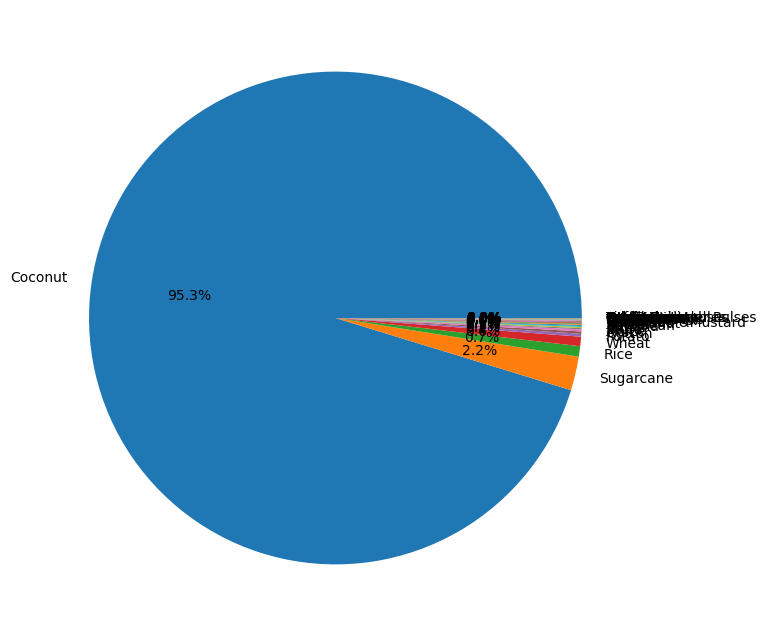

In [51]:
# we plotted pie chart of Production of different crops to check the outliers in crops
plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

In [52]:
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to visualize coconut seprately

coconut_df = crop_df[crop_df['Crop'] == 'Coconut']

coconut_df.to_csv('coconut_df.csv')

crop_df.drop(crop_df[crop_df['Crop']=='Coconut'].index,inplace=True)

In [53]:
# we plotted pie chart between total Production and different types of crops after removing outlier 

val=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].values
lab=crop_df.groupby('Crop').sum().sort_values(by='Production',ascending = False)['Production'].index

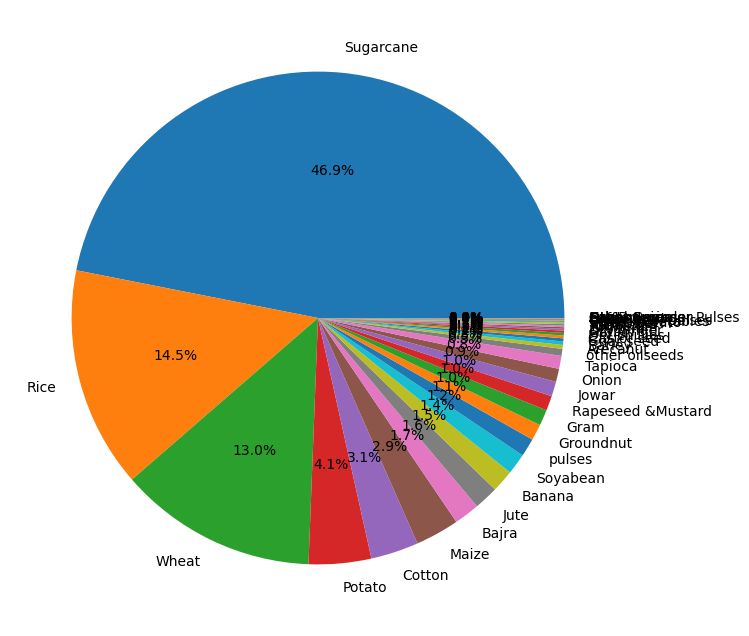

In [54]:
# we have observed that now our dataset is balance

plt.figure(figsize=(10,8))
plt.pie(val,labels=lab,autopct='%0.1f%%')
plt.show()

# Conclusion


In [56]:
# Since we have found out that number of outliers are almost approx 20% and 46000k in numbers so we can not remove these outliers
# to avoide loss of information and producation also depends types soil and area,availability of water to farmer
# so we dont have much information about these other factors so we cant not remove outliers on basis of Producation_area_factor  
# Producation_area_factor can not be same for all crops sinces this factors is hihh for coconut and very less for total_foodgrain
# so we cant not compare both on one scale
# we have observed that Production of coconut is more than 92% of total Production so we not able to visualize our dataset
# so we have decided to consider coconut as an outlier and we have removed it from dataset